In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 數值微分
## df(x) / dx = lim h-> 0 (f(x+h) - f(x)) / h

In [2]:
# Define a target function
def my_function(x):
    # y = 0.01x^2 + 0.1x
    return 0.01*x**2 + 0.1*x

# Wrong Example
def numerical_diff_1(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

# Correct Example
def numerical_diff_2(f, x):
    h = 1e-4
    return ( f(x+h) - f(x-h) ) / (2 * h)

print(numerical_diff_1(my_function, 5))
print(numerical_diff_1(my_function, 10))
print(numerical_diff_2(my_function, 5))
print(numerical_diff_2(my_function, 10))

0.0
0.0
0.1999999999990898
0.2999999999986347


# 偏微分
$ y = x0^2 + x1^2 $

1) if $ x0 = 3, x1 = 4, df / dx0 = ? $

2) if $ x0 = 3, x1 = 4, df / dx1 = ? $

In [3]:
# Only example
# y = x0^2 + x1^2
def partial_derivative(x):
    return x[0]**2 + x[1]**2

# if x0 = 3, x1=4, ask: df/dx0
def par_dev_fun1(x0):
    return (x0**2) + (4 * 2)

# if x0 = 3, x1=4, ask: df/dx1
def par_dev_fun2(x1):
    return (2 * 3) + (x1**2)

print(numerical_diff_2(par_dev_fun1, 3))
print(numerical_diff_2(par_dev_fun2, 4))

6.00000000000378
7.999999999999119


# 梯度
### To visualize the curve: https://goo.gl/iXTXGc

In [4]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) # a multi-dimensional iterator (to iterate over an array)
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        # print(f(x))
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

print(numerical_gradient(partial_derivative, np.array([3.0, 4.0])))
print(numerical_gradient(partial_derivative, np.array([3.0, 2.0])))
print(numerical_gradient(partial_derivative, np.array([0.0, 0.0])))

[ 6.  8.]
[ 6.  4.]
[ 0.  0.]


$$ x^2 + y^2 $$
$$ x^2 - y^2 $$
![Image of gradient](https://mse.redwoods.edu/darnold/math50c/matlab/gradient/figure3.png)

# Single Layer Neural network

In [40]:
# define activation: softmax
def softmax(x):
    if x.ndim == 2:
        x = x.T # Transpose it
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    return np.exp(x) / np.sum(np.exp(x))

# define activation: sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define cross_entropy
def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [41]:
class simple_feedforward_network:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy(y, t)
        return loss
    

In [42]:
net = simple_feedforward_network()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)

np.argmax(x)
t = np.array([0, 0, 1])
net.loss(x,t)

[[-0.98087398  0.98255087 -0.58693785]
 [-1.19484347 -1.65856974 -0.63284968]]


0.91421013410416574

In [43]:
def f(W):
    return net.loss(x,t)
print(net.W)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.98087398  0.98255087 -0.58693785]
 [-1.19484347 -1.65856974 -0.63284968]]
[[ 0.11449864  0.24500147 -0.35950011]
 [ 0.17174796  0.3675022  -0.53925016]]


# Define two layer network

In [44]:
class Two_layerNet:
    def __init__(self, 
                 input_size, 
                 hidden_size, 
                 output_size, 
                 weight_init_std = 0.01):
        self.params = {}
        self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        # forward
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1, w2) + b2
        y = softmax(a2)
        return y
        
    def loss(self, x, y_true):
        y_pred = self.predict(x)
        return cross_entropy(y_pred, y_true)
    
    def compute_acc(self, x, y_true):
        y_pred = self.predict(x)
        # take argmax
        y_pred = y_pred.argmax(axis = 1) 
        y_true = y_true.argmax(axis = 1)
        
        acc = np.sum(y_pred == y_true) / len(y_true)
        return acc
    
    def numerical_gradient(self, x, y_true):
        loss_W = lambda W: self.loss(x, y_true)
        grads = {}
        grads['w1'] = numerical_gradient(loss_W, self.params['w1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['w2'] = numerical_gradient(loss_W, self.params['w2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

100%|██████████████████████████████████████████████████████| 5001/5001 [38:36<00:00,  2.16it/s]


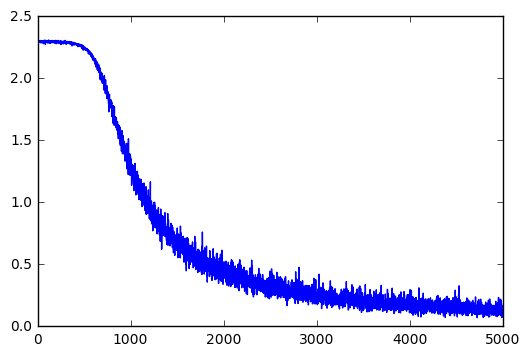

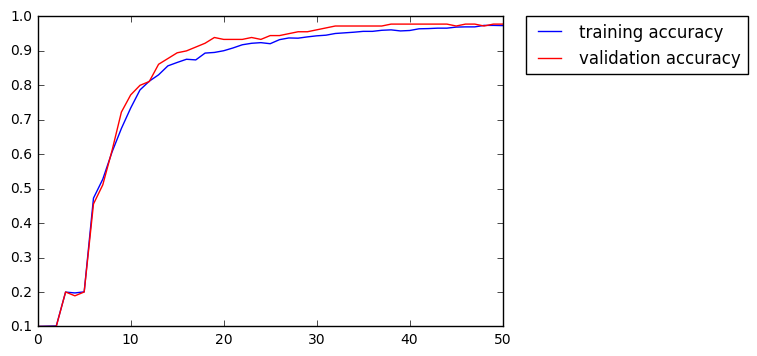

In [45]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm import tqdm
digits = load_digits()

x_, y_ = digits.data, digits.target

# do some data preprocessing
y_one_hot = np.zeros((len(y_), 10))
y_one_hot[np.arange(len(y_)), y_] = 1

x_ = x_ / x_.max() # normailze it to 0 - 1

# do train_test split
x_train, x_test, y_train, y_test = train_test_split(x_, y_one_hot, test_size = 0.1, stratify = y_)

# define training settings ------------
train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 5001
train_size = x_train.shape[0] # numbers of training samples
bz = 100 # batch size
lr = 0.1 # learning rate

network = Two_layerNet(input_size=64, hidden_size=25, output_size=10)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, bz)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, y_batch) # already contain a feed-forward processing in this step
    
    for key in ("w1", "b1", "w2", "b2"):
        network.params[key] -= lr * grad[key]
        
    this_loss = network.loss(x_batch, y_batch)
    train_loss_list.append(this_loss)
    
    if i % 100 == 0:
        # compute accuracy for every 50 updates
        train_acc = network.compute_acc(x_train, y_train)
        test_acc = network.compute_acc(x_test, y_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        #print("Train accuarcy, Test accuracy | " + str(train_acc) + ", " + str(test_acc))
        
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b-')
plt.show()

plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b-', label = 'training accuracy')
plt.plot(np.arange(len(test_acc_list)), test_acc_list, 'r-', label = 'validation accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Create network by layers and use gradient descent with computation graph
### 可以把每個操作拆解成局部區域進行微分: Simple examples

超商裡的蘋果 1 顆 100 元, 橘子 1 顆 150 元, 結帳時要抽 10% 營業稅, 如果小明買了 2 顆蘋果和 3 顆橘子, 請問若 ... <br>
1. 多買一顆蘋果，對結帳價錢的變化?
2. 蘋果一顆的價錢漲 1 元時，對結帳價錢的變化?
3. 營業稅多 1% 時，對價錢的變化?

In [29]:
class mul_layer():
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
# ----------- #
n_apples = 2
price_per_apple = 100
tax = 1.1

# Build network
mul_apple_layer = mul_layer()
mul_tax_layer = mul_layer()

# forward
apple_price = mul_apple_layer.forward(price_per_apple, n_apples)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
d_apple_price, d_tax = mul_tax_layer.backward(dprice)
d_apple, d_apple_num = mul_apple_layer.backward(d_apple_price)

# results
print("apple price: %i" % price)
print("dApple: %.2f" % d_apple_price)
print("dApple_num: %.2f" % d_apple_num)
print("dTax: %.2f" % d_tax)

apple price: 220
dApple: 1.10
dApple_num: 110.00
dTax: 200.00


## Exercise
- 多買一顆橘子，對結帳價錢的變化?
- 橘子一顆的價錢漲 1 元時，對結帳價錢的變化?

In [27]:
class add_layer():
    def __init__(self):
        pass
    def forward(self, x, y):
        return x+y
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

n_apples = 2
n_oranges = 3
price_per_apple = 100
price_per_orange = 150
tax = 1.1

# Build network
mul_apple_layer = mul_layer()
mul_orange_layer = mul_layer()
add_apple_orange_layer = add_layer()
mul_tax_layer = mul_layer()

# forward
apple_price = mul_apple_layer.forward(price_per_apple, n_apples)
orange_price = mul_orange_layer.forward(price_per_orange, n_oranges)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
total_price = mul_tax_layer.forward(all_price, tax)
print("total price: %i" % total_price)

# backward
dprice = 1 # dz / dz = 1
d_all_price, d_tax = mul_tax_layer.backward(dprice)
d_apple_price, d_orange_price = add_apple_orange_layer.backward(d_all_price)
d_orange_price, d_orange_num = mul_orange_layer.backward(d_orange_price)
d_apple_price, d_apple_num = mul_apple_layer.backward(d_apple_price)

print("dApple: %.2f" % d_apple_price)
print("dApple_num: %.2f" % d_apple_num)
print("dOrange: %.2f" % d_orange_price)
print("dOrange_num: %.2f" % d_orange_num)
print("dTax: %.2f" % d_tax)


total price: 715
dApple: 2.20
dApple_num: 110.00
dOrange: 3.30
dOrange_num: 165.00
dTax: 650.00


# Create network by layers and use gradient descent
### Real example

In [32]:
# Define other layer functions
class sigmoid_layer():
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # dL/dy * y * (1-y)
        return dx
    
class relu_layer():
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

class affine_layer():
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.original_x_shape = None
        self.dW =None
        self.db = None
        
    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        dx = dx.reshape(*self.original_x_shape)
        
        return dx
    
def softmax(x):
    if x.ndim == 2:
        x = x.T # Transpose it
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    return np.exp(x) / np.sum(np.exp(x))

# define cross_entropy
def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class softmax_with_crossentropy():
    def __init__(self):
        self.loss = None
        self.y = None # softmax output
        self.t = None # target (ground-truth)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy(self.y, self.t)
        
        return self.loss
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

In [49]:
from collections import OrderedDict # this is a built-in function -- dictionary with order

class Two_layerNet_bp:
    def __init__(self, 
                 input_size, 
                 hidden_size, 
                 output_size, 
                 weight_init_std = 0.01):
        self.params = {}
        self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # build network
        self.layers = OrderedDict()
        self.layers['affine_1'] = affine_layer(self.params['w1'], self.params['b1'])
        self.layers['sigmoid_1'] = sigmoid_layer()
        self.layers['affine_2'] = affine_layer(self.params['w2'], self.params['b2'])
        # output layer
        self.lastlayer = softmax_with_crossentropy()
        
    def predict(self, x):
        # forward
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, y_true):
        y_pred = self.predict(x)
        return self.lastlayer.forward(y_pred, y_true)
    
    def compute_acc(self, x, y_true):
        y_pred = self.predict(x)
        # take argmax
        y_pred = y_pred.argmax(axis = 1) 
        y_true = y_true.argmax(axis = 1)
        
        acc = np.sum(y_pred == y_true) / len(y_true)
        return acc
    
    def gradient(self, x, t):
        # forward path
        self.loss(x, t)
        
        # backward
        dout = 1
        dout = self.lastlayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        # gradient init and setting
        grads = {}
        grads['w1'] = self.layers['affine_1'].dW
        grads['b1'] = self.layers['affine_1'].db
        grads['w2'] = self.layers['affine_2'].dW
        grads['b2'] = self.layers['affine_2'].db
        
        return grads

100%|████████████████████████████████████████████████████| 5001/5001 [00:02<00:00, 2101.10it/s]


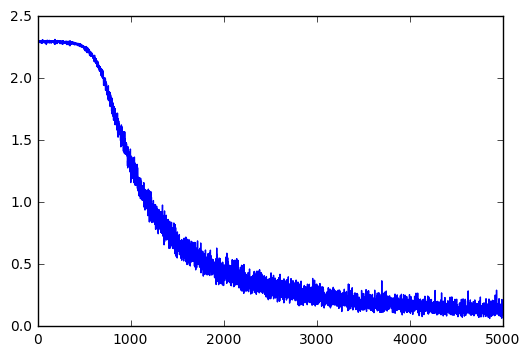

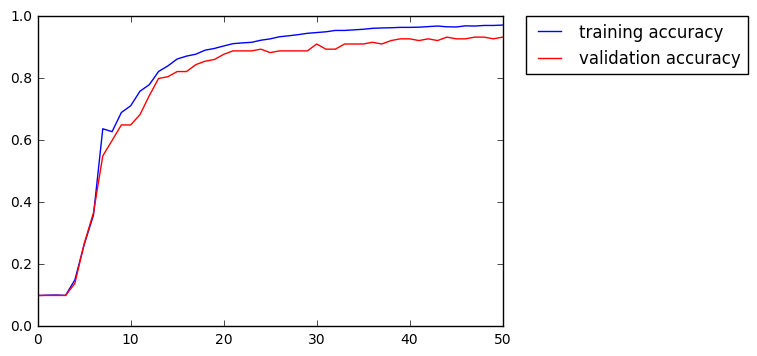

In [50]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm import tqdm
digits = load_digits()

x_, y_ = digits.data, digits.target

# do some data preprocessing
y_one_hot = np.zeros((len(y_), 10))
y_one_hot[np.arange(len(y_)), y_] = 1

x_ = x_ / x_.max() # normailze it to 0 - 1

# do train_test split
x_train, x_test, y_train, y_test = train_test_split(x_, y_one_hot, test_size = 0.1, stratify = y_)

# define training settings ------------
train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 5001
train_size = x_train.shape[0] # numbers of training samples
bz = 100 # batch size
lr = 0.1 # learning rate

network = Two_layerNet_bp(input_size=64, hidden_size=25, output_size=10)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, bz)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.gradient(x_batch, y_batch) # already contain a feed-forward processing in this step
    
    for key in ("w1", "b1", "w2", "b2"):
        network.params[key] -= lr * grad[key]
        
    this_loss = network.loss(x_batch, y_batch)
    train_loss_list.append(this_loss)
    
    if i % 100 == 0:
        # compute accuracy for every 50 updates
        train_acc = network.compute_acc(x_train, y_train)
        test_acc = network.compute_acc(x_test, y_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        #print("Train accuarcy, Test accuracy | " + str(train_acc) + ", " + str(test_acc))
        
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b-')
plt.show()

plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b-', label = 'training accuracy')
plt.plot(np.arange(len(test_acc_list)), test_acc_list, 'r-', label = 'validation accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Reference: Deep learning, build up network from scratch with Python
https://www.tenlong.com.tw/products/9789864764846